## Library

In [77]:
import numpy as np
import pandas as pd
import pickle as pkl
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

## Load the saved pickle data

In [78]:
# # Generate random dots
# dots = np.random.rand(3, 10) * 100 # Shape ndot * ndim

with open('X_C_I_list.pkl', 'rb') as handle:
    X_C_I_list = pkl.load(handle)
    
X_list = X_C_I_list[0]

X = np.vstack(X_list).squeeze(axis = 2).T


X = X.T
# X is now (n, 3)

X.shape

(5704, 3)

# Apply Kernel K-Means Algorithm

In [79]:
def kmeans_outlier_remover_and_plot(X, k, threshold):
    
    mean_center = np.mean(X, axis = 0)
    dist_vec = np.linalg.norm(X - mean_center, axis = 1)
    cluster_assignments = KMeans(n_clusters=k, random_state=0).fit_predict(dist_vec[:,None])
    
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    pts_lost = 0

    X_clean_list = []
    for i in range(k):

        X_k = X[np.where(cluster_assignments == i)]


        if len(X_k) >= threshold:
            ax.scatter3D(X_k[:,0],X_k[:,1],X_k[:,2])
            X_clean_list.append(X_k)
            plt.show()
        else:
            pts_lost += len(X_k)

    print(pts_lost)

    X_clean = np.vstack(X_clean_list)
    
    return X_clean


def kmeans_outlier_remover_and_plot(X, k, threshold):
    
    mean_center = np.mean(X, axis = 0)
    dist_vec = np.linalg.norm(X - mean_center, axis = 1)
    cluster_assignments = KMeans(n_clusters=k, random_state=0).fit_predict(dist_vec[:,None])
    
    fig = plt.figure()
    ax = plt.axes(projection='3d')
    pts_lost = 0

    X_clean_list = []
    for i in range(k):

        X_k = X[np.where(cluster_assignments == i)]


        if len(X_k) >= threshold:
            
            ax.scatter3D(X_k[:,0],X_k[:,1],X_k[:,2])
            X_clean_list.append(X_k)
            plt.show()
        else:
            pts_lost += len(X_k)

    print(pts_lost)

    X_clean = np.vstack(X_clean_list)
    
    return X_clean


In [87]:
mean_center = np.mean(X, axis = 0)

In [94]:
dist_vec = np.linalg.norm(X - mean_center, axis = 1)**2

In [95]:
k = 100
threshold = 4 #num points to consider as outliers

cluster_assignments = KMeans(n_clusters=k, random_state=0).fit_predict(dist_vec[:,None])

<IPython.core.display.Javascript object>


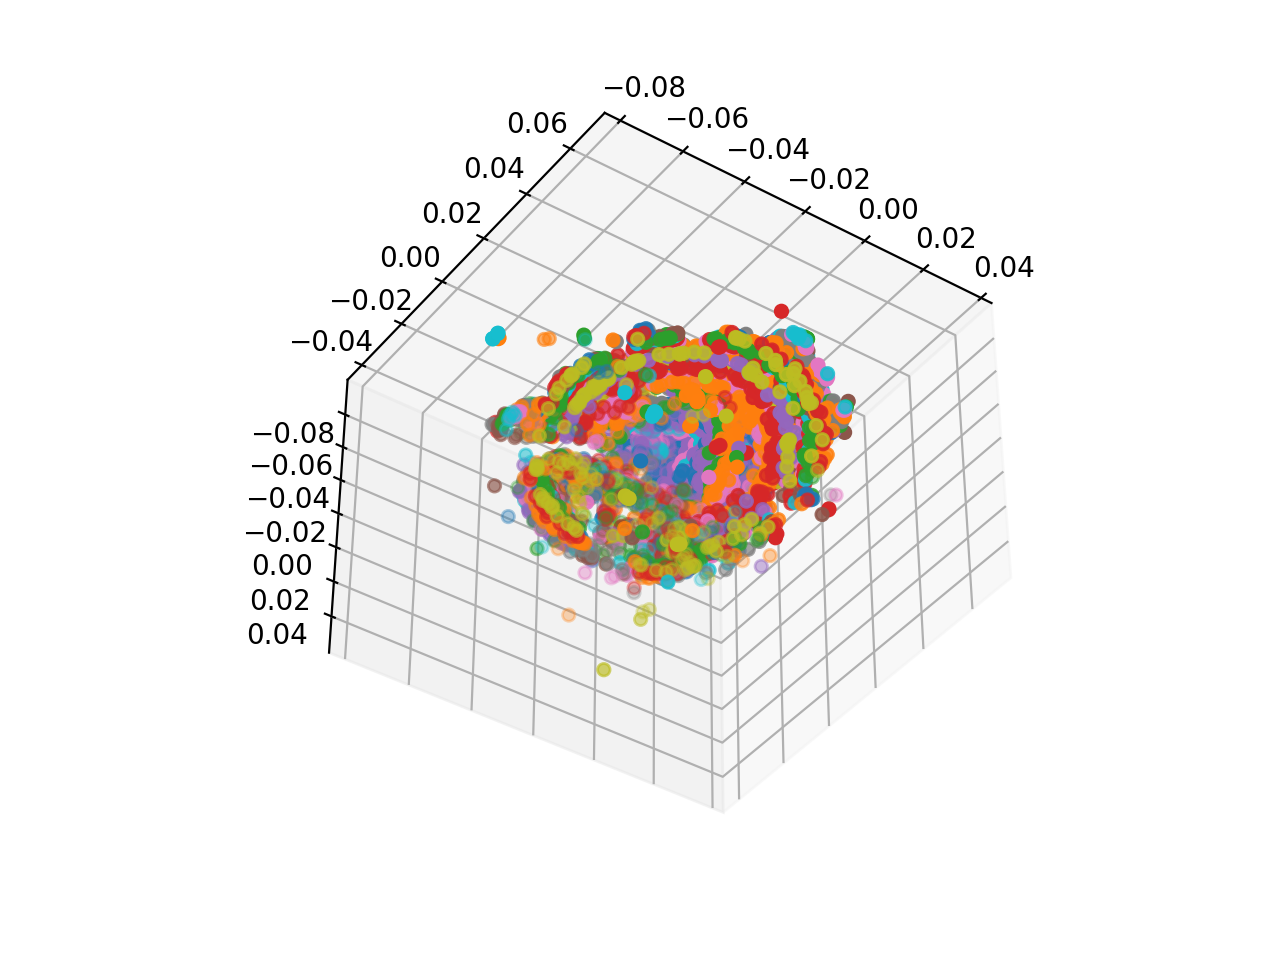

46


In [96]:
%matplotlib notebook

fig = plt.figure()
ax = plt.axes(projection='3d')
pts_lost = 0

X_clean_list = []
for i in range(k):

    X_k = X[np.where(cluster_assignments == i)]
    
    
    if len(X_k) >= threshold:
        ax.scatter3D(X_k[:,0],X_k[:,1],X_k[:,2])
        X_clean_list.append(X_k)
        plt.show()
    else:
        pts_lost += len(X_k)
    
print(pts_lost)

X_clean = np.vstack(X_clean_list)

# scale = 0.05
# ax.set_xlim([-scale, scale])
# ax.set_ylim([-scale, scale])
# ax.set_zlim([-scale, scale])

<IPython.core.display.Javascript object>


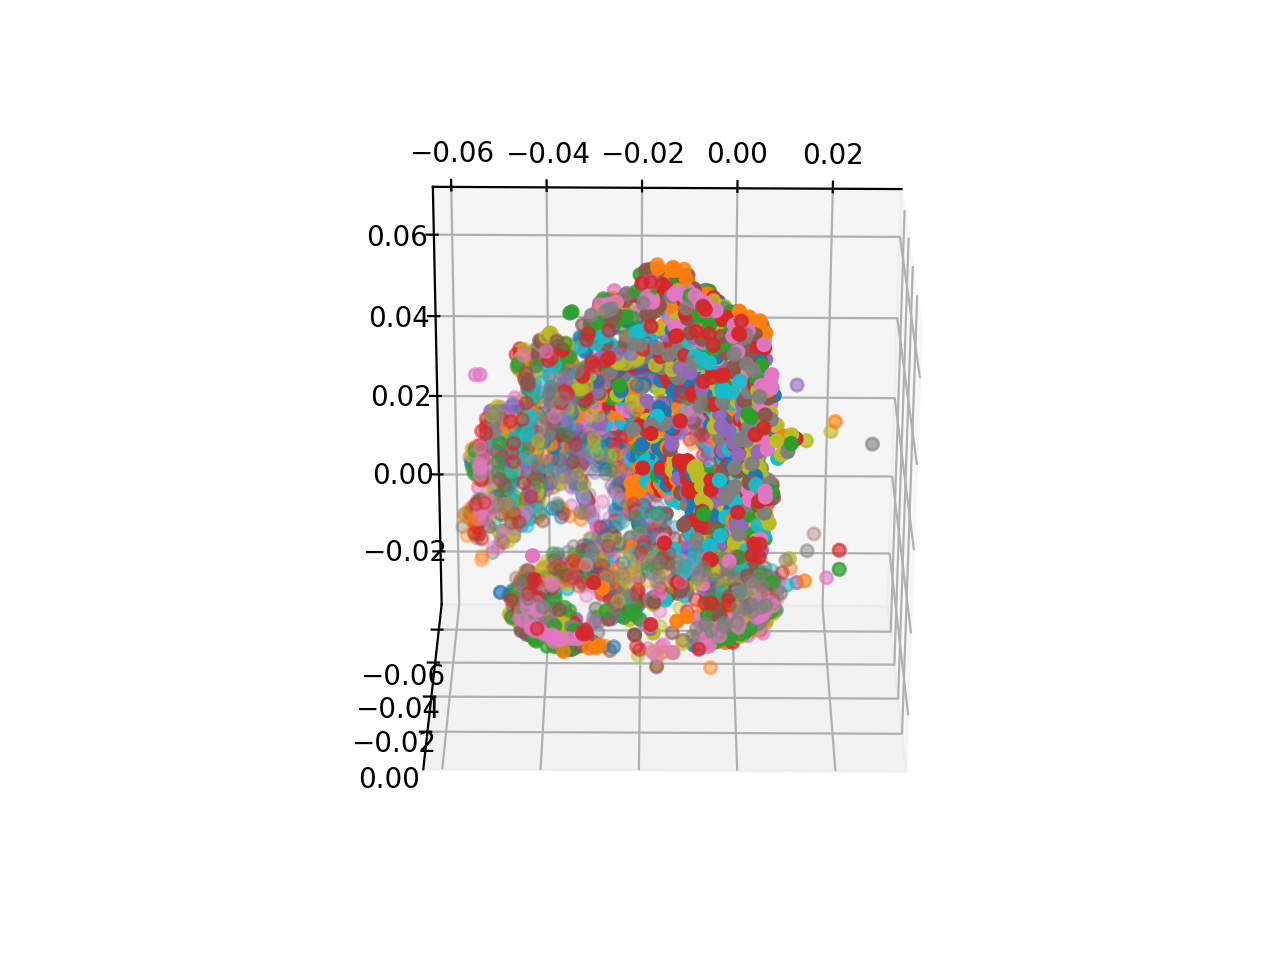

350


array([[-0.01882113,  0.03883184, -0.03955913],
       [-0.01242994,  0.03800066, -0.04002675],
       [-0.00312359,  0.02936292, -0.01784564],
       ...,
       [ 0.00232624,  0.03641901, -0.01578588],
       [-0.03494585,  0.03434619, -0.05117246],
       [ 0.00256551,  0.03576087, -0.01541783]])

In [97]:
kmeans_outlier_remover_and_plot(X, 200, 20)

In [86]:
with open('X_clean_array_1.pkl', 'wb') as handle:
    pkl.dump(X_clean, handle, protocol=pkl.HIGHEST_PROTOCOL)

